#Manipulação de Dados sobre Exportações 🛬

###Etapa 01: Importação do Conjunto de Dados

Nesse primeiro momento, é necessário realizar a importação do conjunto de dados.

In [122]:
# Importação de bibliotecas
import pandas as pd

In [123]:
# Lendo o conjunto de dados em formato .csv
url = '/content/data_fao.csv'
dados = pd.read_csv(url, encoding='ISO-8859-1')

In [124]:
# Verificando a leitura
dados.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


###Etapa 02: Exploração do Conjunto de Dados

Nesse primeiro momento, é importante realizar a exploração do conjunto de dados. Principalmente, antes de iniciar a manipulação do conjunto de dados.

In [125]:
# Obtendo as informações principais do dataframe
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

In [126]:
# Identificando colunas com valores nulos (NaN)
colunas = dados.isnull().sum()
filtro = colunas > 0
colunas_com_vazio = colunas[filtro]
colunas_com_vazio

,0
Y1961,3539
Y1962,3539
Y1963,3539
Y1964,3539
Y1965,3539
Y1966,3539
Y1967,3539
Y1968,3539
Y1969,3539
Y1970,3539


Conclusão: Apenas as colunas que armazenam os valores das exportações possuem valores nulos (NaN). Salvo exceção, das duas últimas colunas (2012 e 2013).

In [127]:
# Transformando os nomes das colunas em uma lista
lista_colunas = colunas_com_vazio.index.to_list()
lista_colunas

['Y1961',
 'Y1962',
 'Y1963',
 'Y1964',
 'Y1965',
 'Y1966',
 'Y1967',
 'Y1968',
 'Y1969',
 'Y1970',
 'Y1971',
 'Y1972',
 'Y1973',
 'Y1974',
 'Y1975',
 'Y1976',
 'Y1977',
 'Y1978',
 'Y1979',
 'Y1980',
 'Y1981',
 'Y1982',
 'Y1983',
 'Y1984',
 'Y1985',
 'Y1986',
 'Y1987',
 'Y1988',
 'Y1989',
 'Y1990',
 'Y1991',
 'Y1992',
 'Y1993',
 'Y1994',
 'Y1995',
 'Y1996',
 'Y1997',
 'Y1998',
 'Y1999',
 'Y2000',
 'Y2001',
 'Y2002',
 'Y2003',
 'Y2004',
 'Y2005',
 'Y2006',
 'Y2007',
 'Y2008',
 'Y2009',
 'Y2010',
 'Y2011']

In [128]:
# Descobrindo se o valor vazio é de fato nulo (NaN)
valores_vazios = []
for coluna_vazia in lista_colunas:
  valores_vazios.append(dados[coluna_vazia].min())
valores_vazios

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

Conclusão: Os valores supostamente inconsistentes são valores zero (0.0). Sendo assim, representam que um país não realizou a exportação de um determinado produto.

In [129]:
# Obtendo os valores únicos da coluna de código de elemento
dados['Element Code'].unique()

array([5142, 5521])

Conclusão: Existem apenas dois valores únicos da coluna de código dos elementos. Portanto, a coluna será excluída.

###Etapa 03: Manipulação do Conjunto de Dados

Agora, será iniciada a transformação do conjunto de dados. De tal forma, a facilitar futuras análises.

In [130]:
# Transformando as duas últimas colunas em valores flutuantes
colunas = ['Y2012', 'Y2013']
dados[colunas] = dados[colunas].astype(float)
dados[colunas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y2012   21477 non-null  float64
 1   Y2013   21477 non-null  float64
dtypes: float64(2)
memory usage: 335.7 KB


In [131]:
# Deletando a coluna de código dos elementos
dados.drop(columns=['Element Code'], inplace=True)
dados.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element,Unit,latitude,longitude,Y1961,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,Food,1000 tonnes,33.94,67.71,1928.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810.0,4895.0
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,183.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425.0,422.0
2,AFG,2,Afghanistan,2513,Barley and products,Feed,1000 tonnes,33.94,67.71,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367.0,360.0
3,AFG,2,Afghanistan,2513,Barley and products,Food,1000 tonnes,33.94,67.71,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78.0,89.0
4,AFG,2,Afghanistan,2514,Maize and products,Feed,1000 tonnes,33.94,67.71,210.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200.0,200.0


In [132]:
# Obtendo todos os nomes das colunas dos valores de exportações
colunas_exportacoes = dados.loc[:, 'Y1961':'Y2013'].columns.to_list()

In [133]:
# Obtendo todos os nomes das colunas que serão mantidas
colunas_mantidas = dados.loc[:, 'Area Abbreviation':'longitude']

In [134]:
# Transformando o formato do dataframe
dados = dados.melt(colunas_mantidas, colunas_exportacoes, 'Year', 'Tonnes')
dados.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element,Unit,latitude,longitude,Year,Tonnes
0,AFG,2,Afghanistan,2511,Wheat and products,Food,1000 tonnes,33.94,67.71,Y1961,1928.0
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,Y1961,183.0
2,AFG,2,Afghanistan,2513,Barley and products,Feed,1000 tonnes,33.94,67.71,Y1961,76.0
3,AFG,2,Afghanistan,2513,Barley and products,Food,1000 tonnes,33.94,67.71,Y1961,237.0
4,AFG,2,Afghanistan,2514,Maize and products,Feed,1000 tonnes,33.94,67.71,Y1961,210.0


In [135]:
# Multiplicando a colunas de toneladas por mil
dados['Tonnes'] = dados['Tonnes'] * 1000.0
dados.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element,Unit,latitude,longitude,Year,Tonnes
0,AFG,2,Afghanistan,2511,Wheat and products,Food,1000 tonnes,33.94,67.71,Y1961,1928000.0
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,Y1961,183000.0
2,AFG,2,Afghanistan,2513,Barley and products,Feed,1000 tonnes,33.94,67.71,Y1961,76000.0
3,AFG,2,Afghanistan,2513,Barley and products,Food,1000 tonnes,33.94,67.71,Y1961,237000.0
4,AFG,2,Afghanistan,2514,Maize and products,Feed,1000 tonnes,33.94,67.71,Y1961,210000.0


In [136]:
# Excluindo a coluna de unidade
dados.drop(columns='Unit', inplace=True)
dados.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element,latitude,longitude,Year,Tonnes
0,AFG,2,Afghanistan,2511,Wheat and products,Food,33.94,67.71,Y1961,1928000.0
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),Food,33.94,67.71,Y1961,183000.0
2,AFG,2,Afghanistan,2513,Barley and products,Feed,33.94,67.71,Y1961,76000.0
3,AFG,2,Afghanistan,2513,Barley and products,Food,33.94,67.71,Y1961,237000.0
4,AFG,2,Afghanistan,2514,Maize and products,Feed,33.94,67.71,Y1961,210000.0


In [137]:
# Deletando a letra 'Y' da coluna de ano
dados['Year'] = dados['Year'].str.replace('Y', '')
dados['Year']

,Year
0,1961
1,1961
2,1961
3,1961
4,1961
...,...
1138276,2013
1138277,2013
1138278,2013
1138279,2013


In [138]:
# Alterando o tipo da coluna de ano para inteiro
dados['Year'] = dados['Year'].astype(int)
dados['Year']

,Year
0,1961
1,1961
2,1961
3,1961
4,1961
...,...
1138276,2013
1138277,2013
1138278,2013
1138279,2013


###Etapa 04: Criação de Conjunto de Dados

Nesse instante, será feita a criação de um conjunto de dados possuindo unicamente informações relevantes dos produtos. Portanto, não levará em considerações os dados dos países e algumas informações dos produtos (código, elemento etc).

In [139]:
# Criando uma cópia do dataframe
produtos = dados
produtos.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element,latitude,longitude,Year,Tonnes
0,AFG,2,Afghanistan,2511,Wheat and products,Food,33.94,67.71,1961,1928000.0
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),Food,33.94,67.71,1961,183000.0
2,AFG,2,Afghanistan,2513,Barley and products,Feed,33.94,67.71,1961,76000.0
3,AFG,2,Afghanistan,2513,Barley and products,Food,33.94,67.71,1961,237000.0
4,AFG,2,Afghanistan,2514,Maize and products,Feed,33.94,67.71,1961,210000.0


In [140]:
# Especificando as colunas para remoção
colunas_remocao = ['Area Abbreviation', 'Area Code', 'Area',
                  'latitude', 'longitude', 'Item Code', 'Element']

In [141]:
# Excluindo as colunas dos países desse dataframe
produtos.drop(columns=colunas_remocao, inplace=True)
produtos.head()

,Item,Year,Tonnes
0,Wheat and products,1961,1928000.0
1,Rice (Milled Equivalent),1961,183000.0
2,Barley and products,1961,76000.0
3,Barley and products,1961,237000.0
4,Maize and products,1961,210000.0


In [144]:
# Agrupando o dataframe antes de realização a transposição
produtos = produtos.groupby(['Year', 'Item'])[['Tonnes']].mean()
produtos.head()

In [146]:
# Transpondo o dataframe para o formato wide
produtos = produtos.pivot_table(index='Year', columns='Item', values='Tonnes')

In [147]:
# Visualizando o dataframe
produtos.head()

Item,Alcoholic Beverages,Animal fats,Apples and products,"Aquatic Animals, Others",Aquatic Plants,"Aquatic Products, Other",Bananas,Barley and products,Beans,Beer,...,"Sweeteners, Other",Tea (including mate),Tomatoes and products,Treenuts,Vegetable Oils,Vegetables,"Vegetables, Other",Wheat and products,Wine,Yams
Year,,,,,,,,,,,,,,,,,,,,,
1961,482234.482759,42983.402490,71741.721854,348.214286,3637.681159,3802.816901,103893.75,207085.201794,56906.25,259234.482759,...,13979.729730,7910.958904,140571.428571,17324.137931,84000.000000,872126.213592,714048.543689,636830.275229,135258.741259,61250.000000
1962,499634.482759,45348.547718,86821.192053,348.214286,4210.144928,4373.239437,107700.00,219349.775785,59368.75,266889.655172,...,14750.000000,7931.506849,150210.884354,17124.137931,89843.137255,868631.067961,701917.475728,663500.000000,139223.776224,60809.523810
1963,517965.517241,46124.481328,92940.397351,366.071429,4181.159420,4352.112676,111900.00,231578.475336,60418.75,277751.724138,...,16020.270270,7945.205479,142816.326531,17696.551724,94078.431373,872412.621359,710606.796117,675802.752294,143972.027972,67654.761905
1964,537765.517241,47141.078838,96086.092715,401.785714,4485.507246,4683.098592,117093.75,242977.578475,62950.00,298234.482759,...,17087.837838,8328.767123,149965.986395,18075.862069,98307.189542,860951.456311,693893.203883,716848.623853,142601.398601,72392.857143
1965,552600.000000,47589.211618,90675.496689,437.500000,5065.217391,5267.605634,128906.25,246390.134529,61293.75,308200.000000,...,18932.432432,8445.205479,155027.210884,17875.862069,103732.026144,885024.271845,713247.572816,774412.844037,146923.076923,78571.428571


array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Y

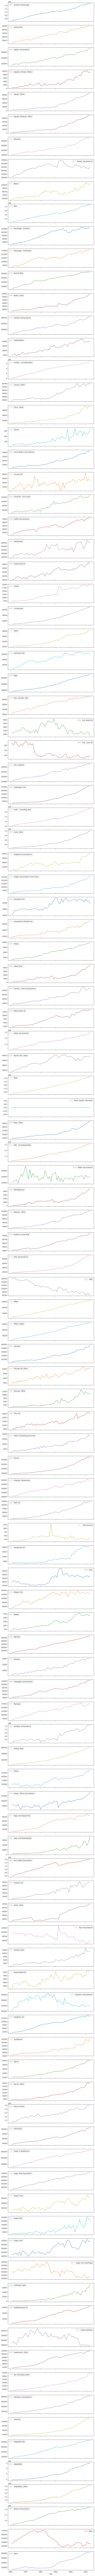

In [148]:
# Construindo um gráfico para cada produto
# Isso mostra a relevância desse formato de dataframe
produtos.plot(subplots=True, figsize=(10, 300))